In [6]:
%pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00
     ---------------------------------------- 62.8/62.8 kB ? eta 0:00:00
     ---------------------------------------- 95.8/95.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.10.0
    Uninstalling requests-2.10.0:
      Successfully uninstalled requests-2.10.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
fixerio 0.1.1 requires requests==2.10.0, but you have requests 2.28.2 which is incompatible.


In [14]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

# Define the start and end dates for the data
start_date = dt.datetime(2007, 1, 1)
end_date = dt.datetime(2022, 12, 31)

# Use the FRED API to get the inflation rate data for the United States
data = web.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)

# Print the data
print(data)

            CPALTT01USM657N
DATE                       
2007-01-01         0.305253
2007-02-01         0.535037
2007-03-01         0.910570
2007-04-01         0.649616
2007-05-01         0.611072
...                     ...
2022-08-01        -0.035440
2022-09-01         0.215078
2022-10-01         0.405649
2022-11-01        -0.101003
2022-12-01        -0.307009

[192 rows x 1 columns]


In [33]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

# Define the start and end dates for the data
start_date = dt.datetime(2007, 1, 1)
end_date = dt.datetime(2022, 12, 1)

# Use the FRED API to get the data for each series
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date)
unemployment_rate = web.DataReader('UNRATE', 'fred', start_date, end_date)
cpi = web.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)
treasury_rate = web.DataReader('DGS10', 'fred', start_date, end_date)
sp500 = web.DataReader('SP500', 'fred', start_date, end_date)
brent_crude_oil_prices = web.DataReader('POILBREUSDM', 'fred', start_date, end_date)
median_income = web.DataReader('MEHOINUSA672N', 'fred', start_date, end_date)
housing_units_started = web.DataReader('HOUST', 'fred', start_date, end_date)

# Combine the data for all series into one dataset
data = pd.concat([gdp, unemployment_rate, cpi, treasury_rate, sp500, brent_crude_oil_prices, median_income, housing_units_started], axis=1)

# Print the data
print(data)

                GDPC1  UNRATE  CPALTT01USM657N  DGS10    SP500  POILBREUSDM  \
DATE                                                                          
2007-01-01  15478.956     4.6         0.305253    NaN      NaN    54.503043   
2007-01-02        NaN     NaN              NaN   4.68      NaN          NaN   
2007-01-03        NaN     NaN              NaN   4.67      NaN          NaN   
2007-01-04        NaN     NaN              NaN   4.62      NaN          NaN   
2007-01-05        NaN     NaN              NaN   4.65      NaN          NaN   
...               ...     ...              ...    ...      ...          ...   
2022-11-25        NaN     NaN              NaN   3.68  4026.12          NaN   
2022-11-28        NaN     NaN              NaN   3.69  3963.94          NaN   
2022-11-29        NaN     NaN              NaN   3.75  3957.63          NaN   
2022-11-30        NaN     NaN              NaN   3.68  4080.11          NaN   
2022-12-01        NaN     3.5        -0.307009   3.5

In [34]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

# Define the start and end dates for the data
start_date = dt.datetime(2008, 1, 1)
end_date = dt.datetime(2022, 1, 1)

# Use the FRED API to get the data for each series
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date).resample('M').last()
unemployment_rate = web.DataReader('UNRATE', 'fred', start_date, end_date).resample('M').last()
cpi = web.DataReader('CPALTT01USM657N', 'fred', start_date, end_date).resample('M').last()
treasury_rate = web.DataReader('DGS10', 'fred', start_date, end_date).resample('M').last()
sp500 = web.DataReader('SP500', 'fred', start_date, end_date).resample('M').last()
brent_crude_oil_prices = web.DataReader('POILBREUSDM', 'fred', start_date, end_date).resample('M').last()
median_income = web.DataReader('MEHOINUSA672N', 'fred', start_date, end_date).resample('M').last()
housing_units_started = web.DataReader('HOUST', 'fred', start_date, end_date).resample('M').last()

# Combine the data for all series into one dataset
data = pd.concat([gdp, unemployment_rate, cpi, treasury_rate, sp500, brent_crude_oil_prices, median_income, housing_units_started], axis=1)

# Print the data
print(data)


                GDPC1  UNRATE  CPALTT01USM657N  DGS10    SP500  POILBREUSDM  \
DATE                                                                          
2008-01-31  15702.906     5.0         0.497058   3.67      NaN    92.091739   
2008-02-29        NaN     4.9         0.290411   3.53      NaN    94.722381   
2008-03-31        NaN     5.1         0.866821   3.45      NaN   103.161905   
2008-04-30  15792.773     5.0         0.606478   3.77      NaN   110.033182   
2008-05-31        NaN     5.4         0.842089   4.06      NaN   123.862273   
...               ...     ...              ...    ...      ...          ...   
2021-09-30        NaN     4.8         0.271597   1.52  4307.54    74.749545   
2021-10-31  20006.181     4.5         0.830812   1.55  4605.38    83.865238   
2021-11-30        NaN     4.2         0.491343   1.43  4567.00    80.890455   
2021-12-31        NaN     3.9         0.307252   1.52  4766.18    74.678261   
2022-01-31  19924.088     4.0         0.841457    Na

In [1]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

# Define the start and end dates for the data
start_date = dt.datetime(2008, 1, 1)
end_date = dt.datetime(2022, 1, 1)

# Use the FRED API to get the data for each series
gdp = web.DataReader('GDPC1', 'fred', start_date, end_date).resample('M').first()
unemployment_rate = web.DataReader('UNRATE', 'fred', start_date, end_date).resample('M').first()
cpi = web.DataReader('CPALTT01USM657N', 'fred', start_date, end_date).resample('M').first()
treasury_rate = web.DataReader('DGS10', 'fred', start_date, end_date).resample('M').first()
sp500 = web.DataReader('SP500', 'fred', start_date, end_date).resample('M').first()
brent_crude_oil_prices = web.DataReader('POILBREUSDM', 'fred', start_date, end_date).resample('M').first()
median_income = web.DataReader('MEHOINUSA672N', 'fred', start_date, end_date).resample('M').first()
housing_units_started = web.DataReader('HOUST', 'fred', start_date, end_date).resample('M').first()

# Combine the data for all series into one dataset
data = pd.concat([gdp, unemployment_rate, cpi, treasury_rate, sp500, brent_crude_oil_prices, median_income, housing_units_started], axis=1)

# Print the data
print(data)


C:\Users\baker\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


                GDPC1  UNRATE  CPALTT01USM657N  DGS10    SP500  POILBREUSDM  \
DATE                                                                          
2008-01-31  15702.906     5.0         0.497058   3.91      NaN    92.091739   
2008-02-29        NaN     4.9         0.290411   3.62      NaN    94.722381   
2008-03-31        NaN     5.1         0.866821   3.54      NaN   103.161905   
2008-04-30  15792.773     5.0         0.606478   3.57      NaN   110.033182   
2008-05-31        NaN     5.4         0.842089   3.78      NaN   123.862273   
...               ...     ...              ...    ...      ...          ...   
2021-09-30        NaN     4.8         0.271597   1.31  4524.09    74.749545   
2021-10-31  20006.181     4.5         0.830812   1.48  4357.04    83.865238   
2021-11-30        NaN     4.2         0.491343   1.58  4613.67    80.890455   
2021-12-31        NaN     3.9         0.307252   1.43  4513.04    74.678261   
2022-01-31  19924.088     4.0         0.841457    Na

In [2]:
print(data.head())
print(data.info())

                GDPC1  UNRATE  CPALTT01USM657N  DGS10  SP500  POILBREUSDM  \
DATE                                                                        
2008-01-31  15702.906     5.0         0.497058   3.91    NaN    92.091739   
2008-02-29        NaN     4.9         0.290411   3.62    NaN    94.722381   
2008-03-31        NaN     5.1         0.866821   3.54    NaN   103.161905   
2008-04-30  15792.773     5.0         0.606478   3.57    NaN   110.033182   
2008-05-31        NaN     5.4         0.842089   3.78    NaN   123.862273   

            MEHOINUSA672N   HOUST  
DATE                               
2008-01-31        63455.0  1084.0  
2008-02-29            NaN  1103.0  
2008-03-31            NaN  1005.0  
2008-04-30            NaN  1013.0  
2008-05-31            NaN   973.0  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 169 entries, 2008-01-31 to 2022-01-31
Freq: M
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ---------

In [13]:
data = data.rename(columns={
    'GDPC1': 'GDP',
    'UNRATE': 'Unemployment Rate',
    'CPALTT01USM657N': 'Consumer Price Index',
    'SP500': 'S&P 500',
    'POILBREUSDM': 'Brent Crude Oil Prices',
    'MEHOINUSA672N': 'Real Median Household Income',
    'HOUST': 'New Private Housing Units Started'
})


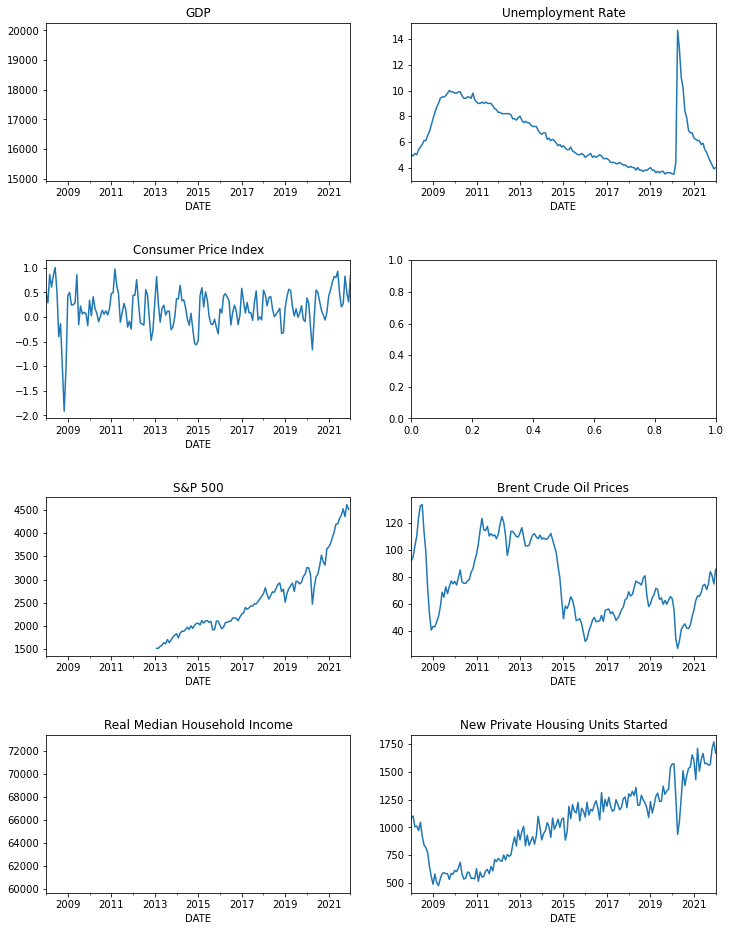

In [15]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))

# Plot each variable in a separate subplot
data['GDP'].plot(ax=axes[0, 0], title='GDP')
data['Unemployment Rate'].plot(ax=axes[0, 1], title='Unemployment Rate')
data['Consumer Price Index'].plot(ax=axes[1, 0], title='Consumer Price Index')
data['S&P 500'].plot(ax=axes[2, 0], title='S&P 500')
data['Brent Crude Oil Prices'].plot(ax=axes[2, 1], title='Brent Crude Oil Prices')
data['Real Median Household Income'].plot(ax=axes[3, 0], title='Real Median Household Income')
data['New Private Housing Units Started'].plot(ax=axes[3, 1], title='New Private Housing Units Started')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()




In [16]:
import pandas as pd
import pandas_datareader as pdr
import datetime

start_date = datetime.datetime(2008, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

fred_data = pdr.DataReader(['GDPC1', 'UNRATE', 'CPALTT01USM657N', 'SP500', 'POILBREUSDM', 'MEHOINUSA672N', 'HOUST'], 'fred', start_date, end_date)

print(fred_data.head())

                GDPC1  UNRATE  CPALTT01USM657N  SP500  POILBREUSDM  \
DATE                                                                 
2008-01-01  15702.906     5.0         0.497058    NaN    92.091739   
2008-02-01        NaN     4.9         0.290411    NaN    94.722381   
2008-03-01        NaN     5.1         0.866821    NaN   103.161905   
2008-04-01  15792.773     5.0         0.606478    NaN   110.033182   
2008-05-01        NaN     5.4         0.842089    NaN   123.862273   

            MEHOINUSA672N   HOUST  
DATE                               
2008-01-01        63455.0  1084.0  
2008-02-01            NaN  1103.0  
2008-03-01            NaN  1005.0  
2008-04-01            NaN  1013.0  
2008-05-01            NaN   973.0  


In [17]:
fred_data.columns = ['GDP', 'Unemployment Rate', 'Consumer Price Index', 'S&P 500', 'Brent Crude Oil Prices', 'Real Median Household Income', 'New Private Housing Units Started']

print(fred_data.head())

                  GDP  Unemployment Rate  Consumer Price Index  S&P 500  \
DATE                                                                      
2008-01-01  15702.906                5.0              0.497058      NaN   
2008-02-01        NaN                4.9              0.290411      NaN   
2008-03-01        NaN                5.1              0.866821      NaN   
2008-04-01  15792.773                5.0              0.606478      NaN   
2008-05-01        NaN                5.4              0.842089      NaN   

            Brent Crude Oil Prices  Real Median Household Income  \
DATE                                                               
2008-01-01               92.091739                       63455.0   
2008-02-01               94.722381                           NaN   
2008-03-01              103.161905                           NaN   
2008-04-01              110.033182                           NaN   
2008-05-01              123.862273                           NaN  

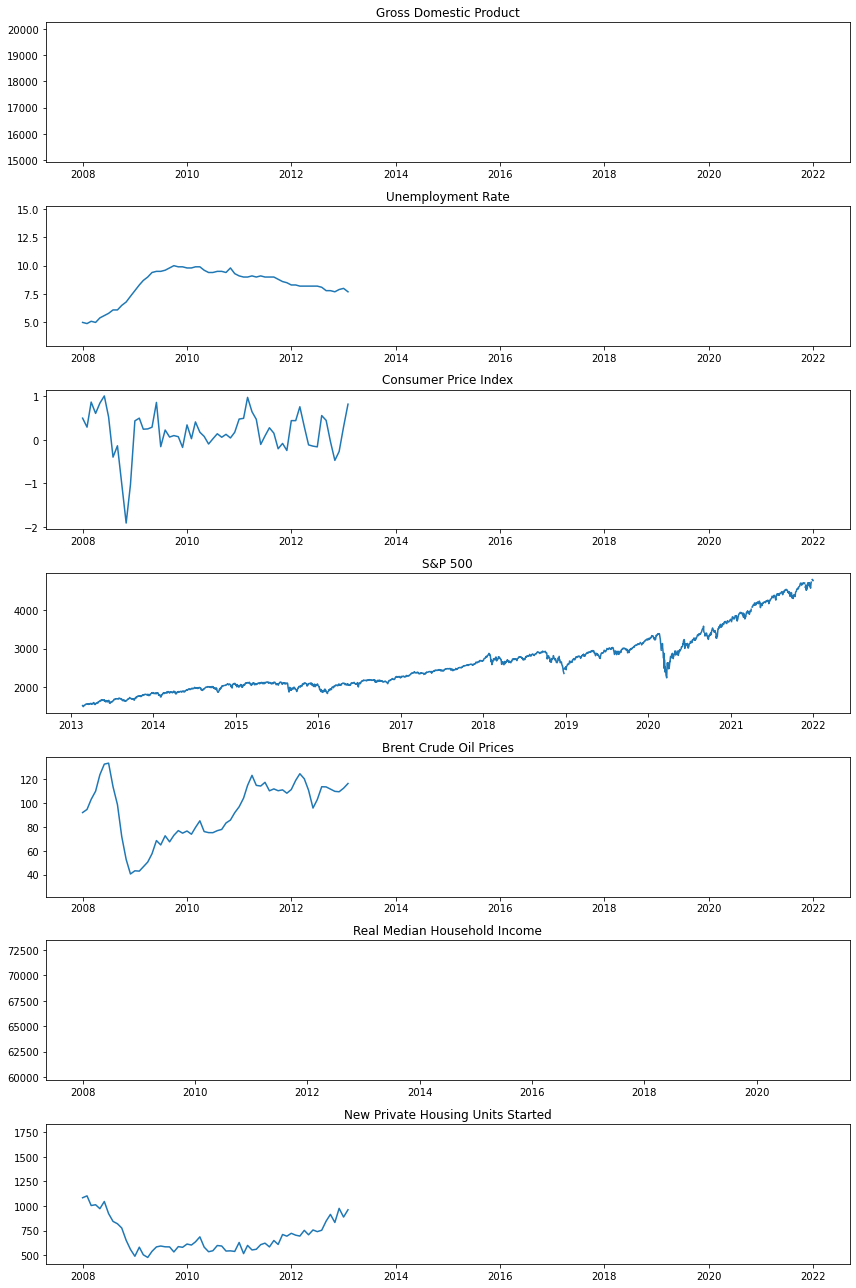

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 1, figsize=(12, 18))

axs[0].plot(fred_data['GDP'])
axs[0].set_title('Gross Domestic Product')

axs[1].plot(fred_data['Unemployment Rate'])
axs[1].set_title('Unemployment Rate')

axs[2].plot(fred_data['Consumer Price Index'])
axs[2].set_title('Consumer Price Index')

axs[3].plot(fred_data['S&P 500'])
axs[3].set_title('S&P 500')

axs[4].plot(fred_data['Brent Crude Oil Prices'])
axs[4].set_title('Brent Crude Oil Prices')

axs[5].plot(fred_data['Real Median Household Income'])
axs[5].set_title('Real Median Household Income')

axs[6].plot(fred_data['New Private Housing Units Started'])
axs[6].set_title('New Private Housing Units Started')

plt.tight_layout()
plt.show()


In [19]:
import pandas as pd
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2022, 1, 1)

cpi = web.DataReader('CPALTT01USM657N', 'fred', start, end)

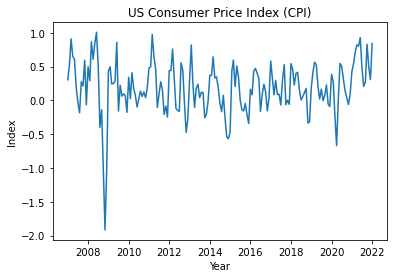

In [21]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt

# Pull CPI data from FRED
cpi = pdr.DataReader('CPALTT01USM657N', 'fred', '2007-01-01', '2022-01-01')

# Rename column
cpi = cpi.rename(columns={'CPALTT01USM657N': 'CPI'})

# Plot time series
plt.plot(cpi.index, cpi['CPI'])
plt.title('US Consumer Price Index (CPI)')
plt.xlabel('Year')
plt.ylabel('Index')
plt.show()

In [25]:
# Import necessary libraries
import pandas as pd
from fbprophet import Prophet

# Load CPI data
cpi_data = pd.read_csv('CPALTT01USM657N.csv', index_col=0, parse_dates=True)
cpi_data = cpi_data.rename(columns={'CPALTT01USM657N': 'cpi'})

# Prepare data for Prophet model
prophet_data = cpi_data.reset_index().rename(columns={'DATE': 'ds', 'cpi': 'y'})

# Create and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Make predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


    File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
    File "<frozen importlib._bootstrap_external>", line 783, in exec_module
    File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
    File "C:\Users\baker\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py", line 50, in <module>
      import pandas.core.computation.expressions as expressions
    File "<frozen importlib._bootstrap>", line 991, in _find_and_load
    File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
    File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
    File "<frozen importlib._bootstrap_external>", line 783, in exec_module
    File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
    File "C:\Users\baker\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py", line 20, in <module>
      from pandas.core.computation.check import NUMEXPR_INSTALLED
    File "<frozen importlib._bootstrap>", line 

ModuleNotFoundError: No module named 'fbprophet'

<AxesSubplot:title={'center':'Consumer Price Index (CPI) in the United States'}, xlabel='DATE'>

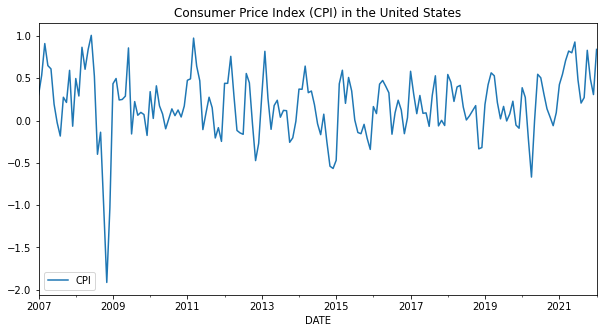

In [3]:
import pandas_datareader as pdr

# Pull data from FRED
cpi = pdr.get_data_fred('CPALTT01USM657N', start='2007-01-01', end='2022-01-01')

# Rename the column
cpi = cpi.rename(columns={'CPALTT01USM657N': 'CPI'})

# Plot the time series
cpi.plot(figsize=(10, 5), title='Consumer Price Index (CPI) in the United States')


In [6]:
% pip install numpy==1.23

UsageError: Line magic function `%` not found.


C:\Users\baker\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\baker\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pand

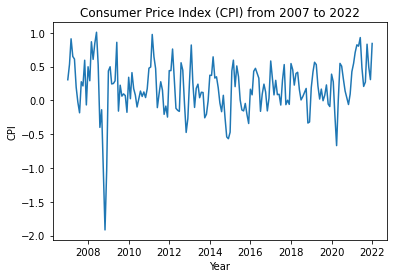

In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# set the start and end dates
start_date = '2007-01-01'
end_date = '2023-01-01'

# pull the CPI data from FRED
cpi_data = pdr.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)

# rename the column to 'CPI'
cpi_data = cpi_data.rename(columns={'CPALTT01USM657N': 'CPI'})

# plot the time series
plt.plot(cpi_data)
plt.title('Consumer Price Index (CPI) from 2007 to 2022')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()


In [2]:
# create the ARIMA model with p=1, d=1, and q=1
model = ARIMA(cpi_data, order=(1, 1, 1))

# fit the model
model_fit = model.fit()

# get a summary of the model
print(model_fit.summary())


C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:574: FutureWarning: is_monotonic is deprecated and will be removed in a future version. Use is_monotonic_increasing instead.
  is_monotonic = index.is_monotonic if date_index else None
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarim

                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                  181
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -49.844
Date:                Tue, 21 Feb 2023   AIC                            105.688
Time:                        22:47:42   BIC                            115.267
Sample:                    01-01-2007   HQIC                           109.572
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5813      0.045     12.951      0.000       0.493       0.669
ma.L1         -1.0000     16.288     -0.061      0.951     -32.924      30.924
sigma2         0.0997      1.624      0.061      0.9

C:\Users\baker\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

# Set start and end dates
start_date = '2007-01-01'
end_date = '2023-01-31'

# Pull CPI data from FRED using datareader
yf.pdr_override()
df = pdr.get_data_fred('CPALTT01USM657N', start=start_date, end=end_date)

# Rename column to something more readable
df = df.rename(columns={'CPALTT01USM657N': 'CPI'})

# Plot the time series
plt.plot(df.index, df['CPI'])
plt.title('CPI Time Series')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

# Use auto_arima to find optimal orders
model = auto_arima(df['CPI'], seasonal=True, m=12)

# Print model summary
model.summary()


ModuleNotFoundError: No module named 'yfinance'

In [35]:
df

,CPI
DATE,
2007-01-01,0.305253
2007-02-01,0.535037
2007-03-01,0.910570
2007-04-01,0.649616
2007-05-01,0.611072
...,...
2021-09-01,0.271597
2021-10-01,0.830812
2021-11-01,0.491343


In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
# Split data into train and test sets
train = df['2007':'2019']
test = df['2020':'2023']

# Fit the SARIMA model
model = SARIMAX(train, order=(2,1,2), seasonal_order=(1,0,1,12))
results = model.fit()

# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')

# Evaluate the model
print('AIC: ', results.aic)
print('BIC: ', results.bic)
print('MSE: ', mean_squared_error(test, predictions))


NameError: name 'df' is not defined

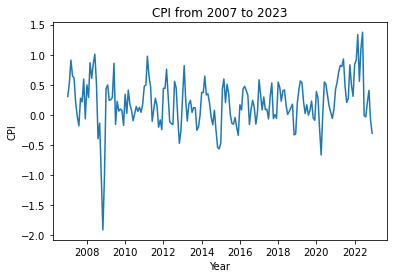

In [1]:
import pandas_datareader.data as pdr

# Set start and end dates
start_date = '2007-01-01'
end_date = '2023-01-01'

# Fetch CPI data from FRED
df = pdr.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)

# Rename the column
df.columns = ['CPI']

# Plot the time series
import matplotlib.pyplot as plt
plt.plot(df)
plt.title('CPI from 2007 to 2023')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

# Save the data to a CSV file
df.to_csv('cpi.csv')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load data from CSV
cpi = pd.read_csv('cpi.csv', index_col='DATE', parse_dates=True)
cpi = cpi.asfreq(freq='MS')


In [3]:
# Split data into training and testing sets
train_data = cpi.loc[:'2018-12-01']
test_data = cpi.loc['2019-01-01':]


In [4]:
# Fit SARIMA model to training data
model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

# Make predictions on testing data
predictions = results.predict(start='2019-01-01', end='2022-12-01')


C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [5]:
# Evaluate model using mean squared error
mse = mean_squared_error(test_data, predictions)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.20895271455420758


In [6]:
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


In [7]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [8]:
model

In [9]:
import itertools
import warnings
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pmdarima as pm
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv('cpi.csv', parse_dates=['DATE'], index_col='DATE')

# Define the parameter ranges for the grid search
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 3)
D = range(0, 2)
Q = range(0, 3)
s = 12

# Generate all possible combinations of the hyperparameters
parameters = list(itertools.product(p, d, q))
seasonal_parameters = list(itertools.product(P, D, Q, [s]))
parameters_list = [(x[0], x[1], x[2], y[0], y[1], y[2], y[3]) for x in parameters for y in seasonal_parameters]

# Split the data into training and validation sets
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Define a function to fit and evaluate a SARIMA model with a given set of hyperparameters
def evaluate_sarima(params):
    try:
        # Fit the model
        model = sm.tsa.statespace.SARIMAX(train, order=(params[0], params[1], params[2]), seasonal_order=(params[3], params[4], params[5], params[6]), enforce_stationarity=False, enforce_invertibility=False)
        results = model.fit(disp=False)
        
        # Make predictions on the validation set
        predictions = results.forecast(steps=len(test))
        
        # Compute the mean squared error
        mse = mean_squared_error(test, predictions)
        
        return mse
    except:
        return np.inf

# Perform the grid search
best_mse = np.inf
best_params = None
for params in parameters_list:
    try:
        mse = evaluate_sarima(params)
        if mse < best_mse:
            best_mse = mse
            best_params = params
    except:
        pass

# Fit the best model on the entire dataset
model = sm.tsa.statespace.SARIMAX(df, order=(best_params[0], best_params[1], best_params[2]), seasonal_order=(best_params[3], best_params[4], best_params[5], best_params[6]), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(disp=False)

# Print the best hyperparameters and the corresponding MSE
print('Best hyperparameters:', best_params)
print('Best MSE:', best_mse)


C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informa

Best hyperparameters: (0, 0, 1, 2, 1, 2, 12)
Best MSE: 0.22692592784712665


In [10]:
cpi_data = df


In [11]:
model = SARIMAX(cpi_data, order=(0, 1, 1), seasonal_order=(2, 0, 1, 12))

# Fit the model
model_fit = model.fit()

# Save the model to a pickle file
import pickle
with open('sarimax_model.pkl', 'wb') as f:
    pickle.dump(model_fit, f)

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
import pickle

with open('sarimax_model.pkl', 'rb') as f:
    sarimax_model = pickle.load(f)


In [13]:
sarimax_model.forecast(12)

2023-01-01    0.240922
2023-02-01    0.299430
2023-03-01    0.401724
2023-04-01    0.218728
2023-05-01    0.264409
2023-06-01    0.250938
2023-07-01   -0.011457
2023-08-01   -0.004725
2023-09-01    0.057504
2023-10-01   -0.052206
2023-11-01   -0.233352
2023-12-01   -0.232377
Freq: MS, Name: predicted_mean, dtype: float64

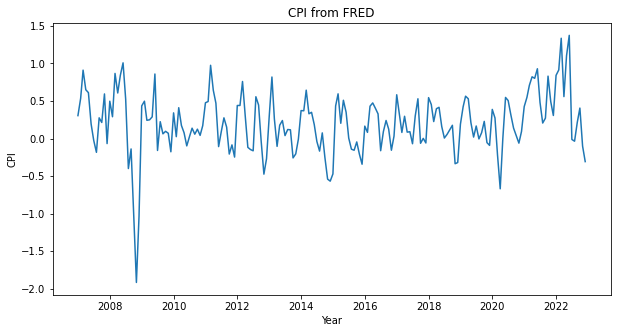

C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\baker\Anaconda3\envs\my-env\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import datetime
import pickle
import pandas_datareader.data as web

# pull CPI data from FRED
start_date = '2007-01-01'
end_date = '2023-01-01'
cpi_data = web.DataReader('CPALTT01USM657N', 'fred', start_date, end_date)

# rename column
cpi_data.columns = ['CPI']

# plot the time series
plt.figure(figsize=(10,5))
plt.plot(cpi_data)
plt.title('CPI from FRED')
plt.xlabel('Year')
plt.ylabel('CPI')
plt.show()

# save the data to csv
cpi_data.to_csv('cpi.csv')

# retrain SARIMAX model with the best params
order = (0, 0, 1)
seasonal_order = (2, 1, 2, 12)
model = SARIMAX(cpi_data, order=order, seasonal_order=seasonal_order, trend='ct')
results = model.fit()

# pickle the model
with open('sarimax_model.pkl', 'wb') as f:
    pickle.dump(results, f)
